In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# combined_data.dtypes

In [5]:
# Checking the number of mice.
mice_n = combined_data['Mouse ID'].count
mice_n = 1893
mice_n

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cleaned_data = combined_data.drop_duplicates(
  subset = ['Mouse ID', 'Timepoint'],
  keep = 'last').reset_index(drop = True)


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 



In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
cleaned_data.count
mice_n = 1888

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume = cleaned_data['Tumor Volume (mm3)']
tumor_mean = np.mean(tumor_volume)
tumor_median = np.median(tumor_volume)
tumor_variance = np.var(tumor_volume, ddof=0)
tumor_sd = np.std(tumor_volume, ddof=0)
tumor_sem = sem(tumor_volume)

print(f"The average of tumor volume for each regimen is {tumor_mean}")
print(f"The median of tumor volume for each regimen is {tumor_median}")
print(f"The variance of tumor volume for each regimen is {tumor_variance}")
print(f"The standard deviation of tumor volume for each regimen is {tumor_sd}")
print(f"The standard error of tumor volume for each regimen is {tumor_sem}")


The average of tumor volume for each regimen is 50.44841133656781
The median of tumor volume for each regimen is 48.951421075
The variance of tumor volume for each regimen is 79.25260719229762
The standard deviation of tumor volume for each regimen is 8.902393340686404
The standard error of tumor volume for each regimen is 0.2049372145148593


In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_mean = cleaned_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
grouped_median = cleaned_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
grouped_variance = cleaned_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
grouped_sd = cleaned_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
grouped_sem = cleaned_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.

summary_statistics_df = pd.DataFrame({"Mean": grouped_mean,
                               "Median": grouped_median,
                               "Variance": grouped_variance,
                                "Standard Deviation" : grouped_sd,
                                "Standard Error" : grouped_sem})
summary_statistics_df


,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Using the aggregation method, produce the same summary statistics in a single line
cleaned_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

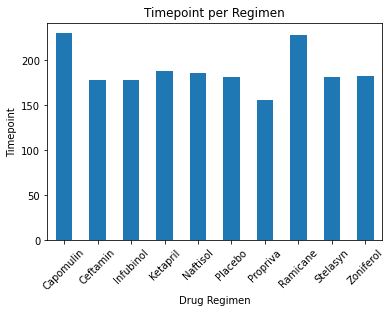

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
grouped_regimens_time = cleaned_data.groupby(['Drug Regimen']).count()
grouped_regimens_time.plot.bar(y='Timepoint', title='Timepoint per Regimen', xlabel='Drug Regimen', ylabel='Timepoint', rot=45, legend=False)
plt.show()



In [14]:
# x = grouped_regimens_time.index
# y = grouped_regimens_time['Timepoint']

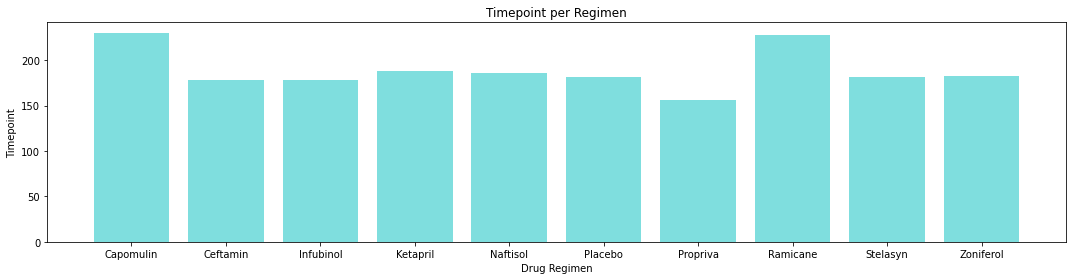

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = grouped_regimens_time.index
y= grouped_regimens_time['Timepoint']
fig = plt.figure(figsize =(15, 4))
plt.bar(x, y, color='c', alpha = 0.5, align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')
plt.title('Timepoint per Regimen')
plt.tight_layout()
plt.show()

In [35]:
# cleaned_data['Sex'].value_counts()

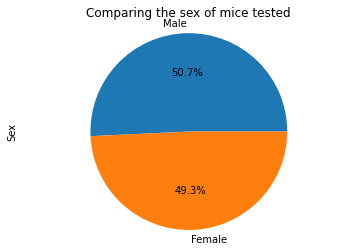

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

cleaned_data['Sex'].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.axis("equal")
plt.title('Comparing the sex of mice tested')
plt.show()




In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


In [37]:
# cleaned_data['Sex'].values

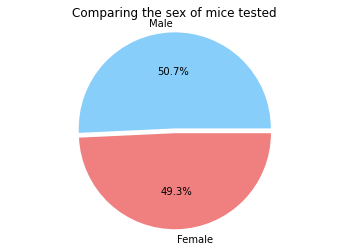

In [20]:
# labels = cleaned_data['Sex'].values
count = cleaned_data['Sex'].value_counts()
colors = ["lightskyblue", "lightcoral"]
explode = (0.05,0)
plt.pie(count, explode=explode,labels=('Male', 'Female'), colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Comparing the sex of mice tested')
plt.show()



In [38]:
# combined_data.dtypes

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
combined_data.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume'})
cleaned_data.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume'})


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Start by getting the last (greatest) timepoint for each mouse
grouped_tumor_volume = cleaned_data.groupby(['Mouse ID', 'Drug Regimen']).max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_timepoint = pd.merge(grouped_tumor_volume, cleaned_data, on=["Mouse ID", "Timepoint"], how='left')
# merged_timepoint

In [25]:
type(merged_timepoint)

pandas.core.frame.DataFrame

 The lower bound is 42.376491720000004 and the upper bound is 49.37251379999999
There are no potential outliers


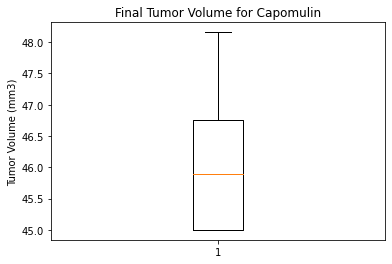

 The lower bound is 42.984251445 and the upper bound is 48.359580925
There are no potential outliers


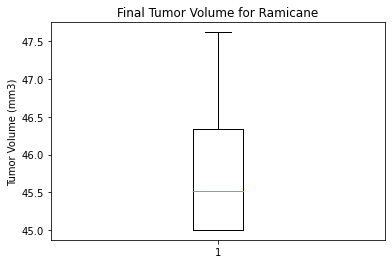

 The lower bound is 36.83290494999999 and the upper bound is 82.74144559000001
There are no potential outliers


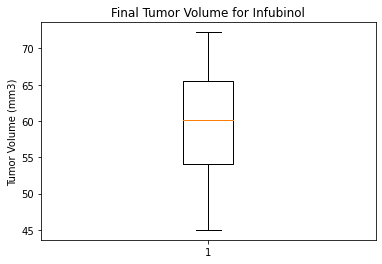

 The lower bound is 25.355449580000002 and the upper bound is 87.66645829999999
There are no potential outliers


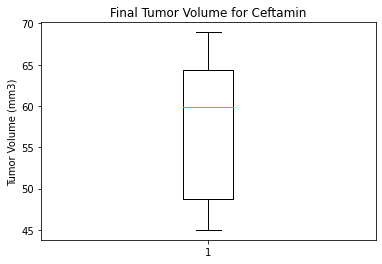

In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol' , 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for d in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    vol = merged_timepoint.loc[merged_timepoint['Drug Regimen'] == d, 'Tumor Volume (mm3)_x']
    tumor_vol_data.append(vol)
    quartiles = vol.quantile([.25,.5,.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper - lower
    lower_bound = lower - 1.5*iqr
    upper_bound = upper + 1.5*iqr
    outliers = vol.loc[(vol < lower_bound) | (vol > upper_bound)]
    print(f" The lower bound is {lower_bound} and the upper bound is {upper_bound}")
    print("There are no potential outliers")  
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'Final Tumor Volume for {d}')
    ax1.set_ylabel('Tumor Volume (mm3)')
    ax1.boxplot(vol)
    plt.show()
    
# Determine outliers using upper and lower bounds


In [27]:
grouped_drug = cleaned_data.groupby('Drug Regimen')
new_capomulin_df = grouped_drug.get_group('Capomulin')
new_capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1447,r157,Capomulin,Male,22,25,0,45.000000,0
1448,r157,Capomulin,Male,22,25,5,45.597064,0
1449,r157,Capomulin,Male,22,25,10,46.059608,0


In [28]:
a_mouse = new_capomulin_df.loc[new_capomulin_df['Mouse ID']== 's185']

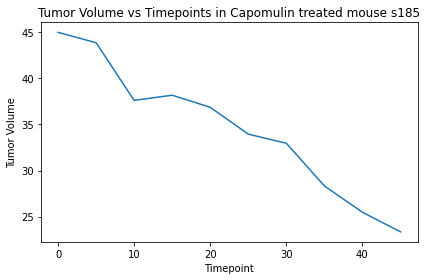

In [29]:
x = a_mouse['Timepoint']
y = a_mouse['Tumor Volume (mm3)']
plt.plot(x,y)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume vs Timepoints in Capomulin treated mouse s185')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

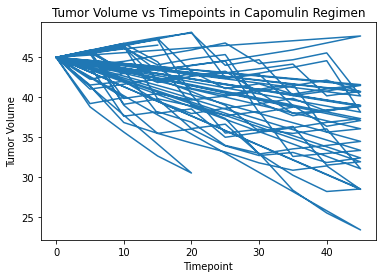

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x = new_capomulin_df['Timepoint']
y = new_capomulin_df['Tumor Volume (mm3)']
plt.plot(x,y)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume vs Timepoints in Capomulin Regimen')
plt.show()


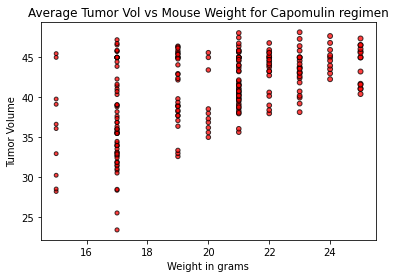

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
y = new_capomulin_df['Tumor Volume (mm3)']
x_axis = new_capomulin_df['Weight (g)']

plt.scatter(x_axis, y, marker="o", facecolors="red", edgecolors="black",
             s=x_axis, alpha=0.75)
plt.title("Average Tumor Vol vs Mouse Weight for Capomulin regimen")
plt.xlabel("Weight in grams")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

The r-squared is: 0.5256995552077166


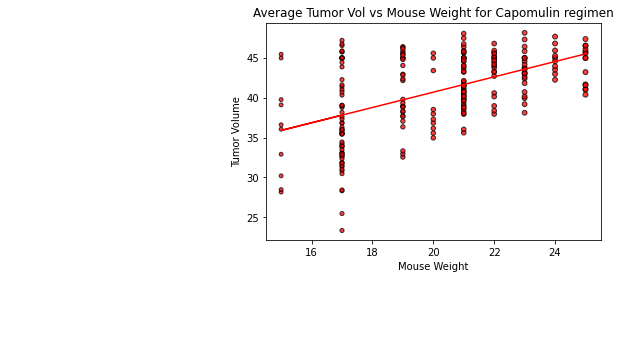

In [32]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

x_values = new_capomulin_df['Weight (g)']
y_values = new_capomulin_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y, marker="o", facecolors="red", edgecolors="black",
             s=x_axis, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Average Tumor Vol vs Mouse Weight for Capomulin regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
print(f"The r-squared is: {rvalue}")
plt.show()

